# TP1 fouille de données
    Mathilde Blandel & Léa Mercier
    Groupe 1 & Groupe 2 FD


## Introduction

Le but de ce tp est de se familiariser avec l'utilisation de l'environnement et des outils que nous utiliserons pendant toute la durée du module.

## L'environnement de travail

### Anaconda

Anaconda est une application open-source tourné vers l'utilisation des langages R et Python avec le cadre des sciences de l'informatique (analyse de données, fouille de données...). Dans notre cas nous utilisons comme une plateforme pour lancer des jupyter notebook, mais elle aussi utile pour créer des environnements distincts contenant des fichiers, packages,librairies, etc.

Pour se familiariser avec les Jupyter Notebook, nous avons utiliser ce tutoriel : [Tutoriel](https://www.dataquest.io/blog/jupyter-notebook-tutorial/)

### Python 

Nous avions toutes les deux des connaissances en Python car ce langage est aussi utilisé pour un module nommé Data Engeneering commencé plus tôt et dans d'autres contextes au cours de l'année précédente. Nous avions donc commencé à nous familiariser avec le langage et les librairies Pandas et Numpy en DE, et d'autres librairies.

Nous avons cependant fait quelque uns des tutoriels proposés pour se "remettre en selle" et d'autres pour apprendre à utiliser Seaborn.

## Tutoriels 

### Numpy

In [1]:
# importation 
import numpy as np

In [2]:
#Les arrays
a = np.arange(10)
bool_array = np.ones((3,3), dtype = bool ) 

# extraire des items qui répondent à une condition
a[a%2 == 1]

# puis les remplacer
#a[a%2 == 1] = -1 #en modifiant
out = np.where(a%2 == 1, -1, a)#sans modifier
out

#Changer la taille
#a.reshape(2,5)
a.reshape(2,-1) # -1 = valeur automatique // attention erreur si la taille est impair

#Concatenation
a = np.arange(10).reshape(2,-1)
b = np.repeat(1, 10).reshape(2,-1)
np.concatenate([a,b], axis = 0) #M1 vertical
np.vstack([a, b]) #M2 
np.r_[a, b] #M3 r = rows

np.concatenate([a,b], axis = 1) #M1 horizontal
np.hstack([a, b]) #M2
np.c_[a, b] #M3 c = columms

#Répétition
a = np.array([1,2,3])
np.c_[np.repeat(a,3), np.tile(a,3)] # sur une ligne, repeat = un par un, tile = le tout

#intersection, différence...
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])
np.intersect1d(a,b) #elements communs sans répétitions
np.setdiff1d(a,b) # supprime les elements de b dans a
where = np.where(a==b) # positions où a==b
a[where] # afficher les elements

a = np.array([2, 6, 1, 9, 10, 3, 27])
where = np.where(np.logical_and(a>=5, a<=10))
a[where]

#fonction 
def max(x,y):
    """Get the max"""
    if x >y :
        return x
    else :
        return y

max(1,2)

#changer ordre des colonnes
arr = np.arange(9).reshape(3,3)
arr[:,[1,0,2]] # inverse les colonnes 0 et 1 ; : = automatique dans le même ordre
arr[[1,0,2],:] # lignes
arr[::-1] # inverse l'ordre des lignes
arr[:,::-1] # inverse l'ordre des colonnes

#changer la précision
rand_arr = np.random.random([5,3])
np.set_printoptions(precision=3)
rand_arr

array([[0.804, 0.381, 0.75 ],
       [0.449, 0.809, 0.737],
       [0.156, 0.459, 0.494],
       [0.486, 0.017, 0.869],
       [0.599, 0.271, 0.903]])

### Pandas

In [3]:
import pandas as pd

In [4]:
#Créer une serie
mylist = list('abcedfghijklmnopqrstuvwxyz')
myarr = np.arange(26)
mydict = dict(zip(mylist, myarr))

ser1 = pd.Series(mylist)
ser2 = pd.Series(myarr)
ser3 = pd.Series(mydict)

ser1.head()#par défaut 5 premiers

#Créer un dataframe
ser = pd.Series(mydict) #serie
df_ser = ser.to_frame().reset_index()

ser = pd.Series(np.random.randint(1, 10, 35)) #array
df = pd.DataFrame(ser.values.reshape(7,5))

#Combiner des series pour obtenir dataframe
df1 = pd.concat([ser1, ser2], axis=1)
df2 = pd.DataFrame({'col1': ser1, 'col2': ser2})

#changer nom d'une serie
ser1.name = 'nouveau_nom'
ser1.head()



#intersection
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

ser1[~ser1.isin(ser2)]
# autre méthode
ser_u = pd.Series(np.union1d(ser1, ser2))  # union
ser_i = pd.Series(np.intersect1d(ser1, ser2))  # intersect
ser1


ser =  np.arange(6).reshape(2,3)
np.argwhere(ser>2)



array([[1, 0],
       [1, 1],
       [1, 2]], dtype=int64)

### Visualization

Seaborn est une librairie permettant de faire des graphiques pour visualiser des données.Dans cette partie,  nous avons essayé quelques fonctionnalités de la librairie sans les approfondir. Le but était principalment les tester.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

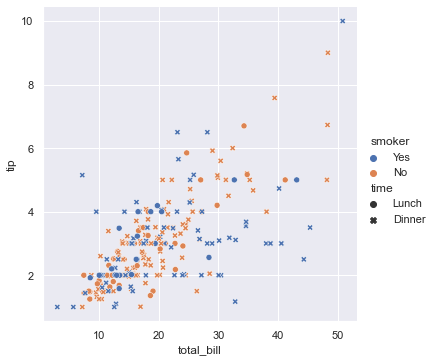

In [6]:
tips = sns.load_dataset("tips")
#hue = un critère / colonne
#style = un style différent pour une colonne
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

In [7]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


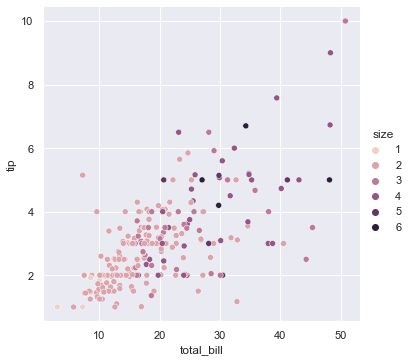

In [8]:
#hue = une information non binaire = un dégradé par valeur
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

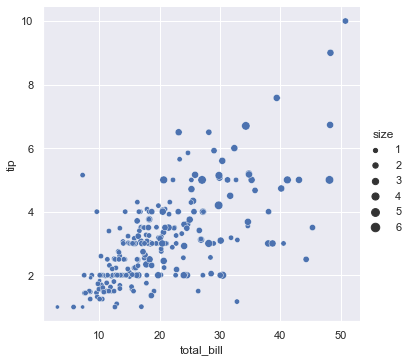

In [9]:
#autre option en variant la taille
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

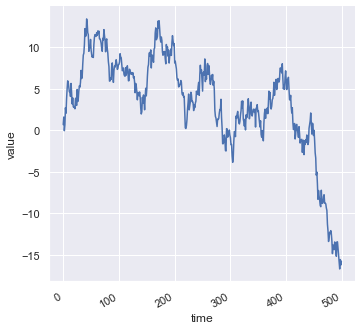

In [11]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

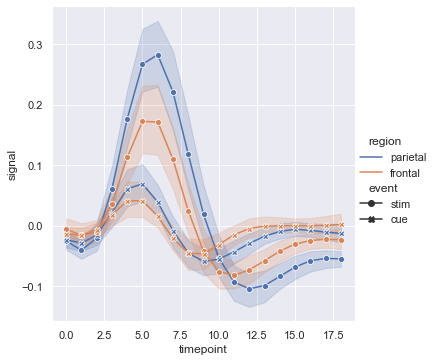

In [12]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

In [17]:
fmri 

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


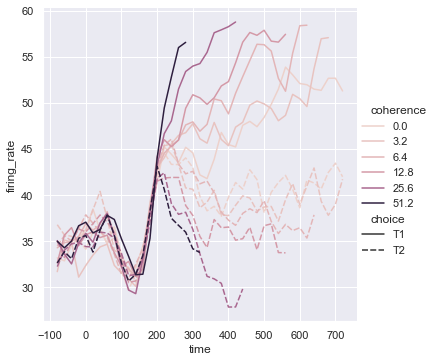

In [13]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

In [14]:
dots

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
389,dots,T2,680,3.2,37.806267
390,dots,T2,700,0.0,43.464959
391,dots,T2,700,3.2,38.994559
392,dots,T2,720,0.0,41.987121


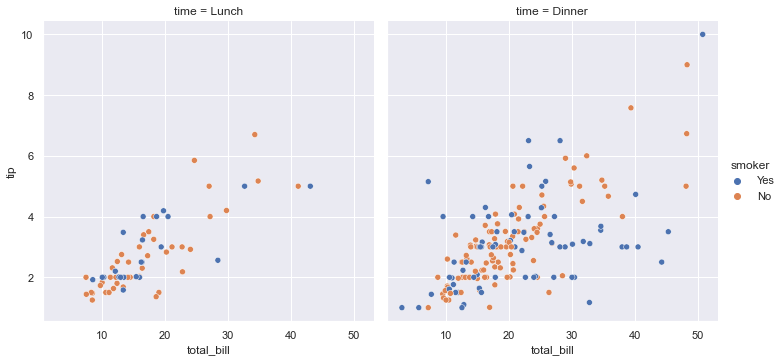

In [15]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

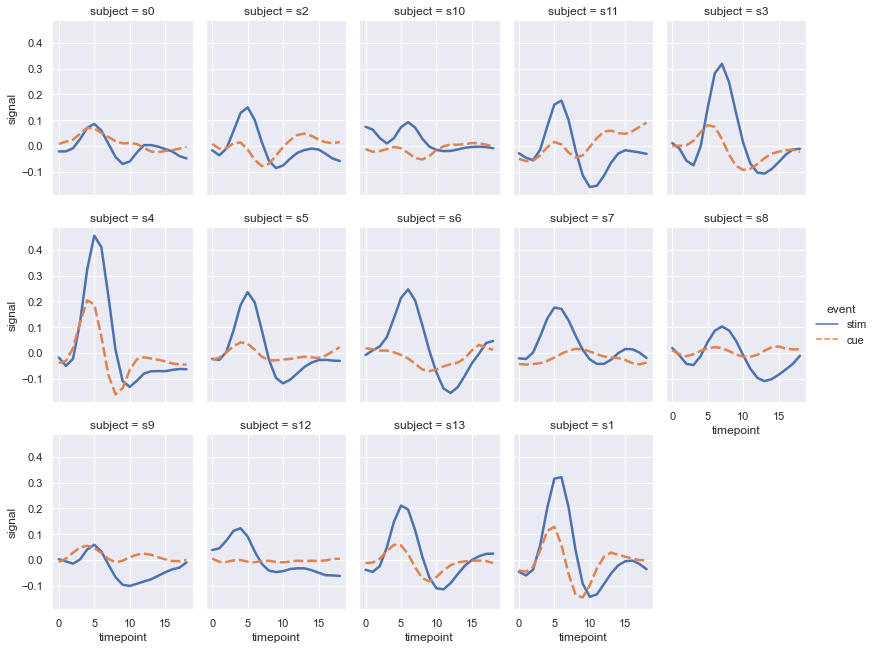

In [16]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));